# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our client is interested in knowing what attributes of a used car lead to higher prices. With this information, the client will be able to make more informed pricing decisions. The task at hand is to identify key drivers for used car prices. To accomplish this, we will use collected data containing various attributes of used cars and their corresponding prices. We will first explore the dataset and perform any data preprocessing as needed prior to modeling. Once data preparations are complete, we can proceed to create predictive models from which we can assess and evaluate attributes that lead to higher prices which we can then inform our client. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Data understanding is a critical step in the CRISP-DM because it lays the foundation for subsquent steps in the process. More specifically, data understanding enables us to identify relevant attributes needed to answer our question regarding used cars. Additionally, it allows us to assess the quality of the data (ex. amount of missing data). These are some steps to better understand the dataset:
- Examine shape of dataset (i.e number of rows and columns)
- Look at data types for each columns
    - Take note which feature are categorical vs numerical 
- Determine if there are columns with null values
    - assess impact of null values:
        - do we decide to drop or impute values
- Identify distribution of classes within a feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn import set_config
set_config(display="diagram")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('data/vehicles.csv')

In [3]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


**Observations:**
- Immediately we notice that the first five rows have missing values. This will need to be explored further.

In [4]:
data.shape

(426880, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Observations:**
- dataset contains lots of non-numeric features


In [6]:
# check the amount of missing values for each column
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

**Observations:**
- At first glance, we can see that a number of columns have missing values.
- To get a better idea how much data is missing, we should view these amount as a percentage of the entire dataset

In [7]:
# Extracting total number of row
total_rows = data.shape[0]
total_rows

426880

In [8]:
# Calculating the percentage of missing values
data.isnull().sum()/total_rows * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

**Observations:**
- The following columns are missing a sizeable amount of data:
    - conditions (40.79%)
    - cylinders (41.62%)
    - VIN (37.73%)
    - drive (30.59%)
    - size (71.77%)
    - type (21.75%)
    - paint_color (30.50%)
- We need to address these in data preparation

In [9]:
# Exploring unique values and correpsonding distribution for categorical features

categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'region']

# using for each loop to display value counts for each class per feature
for col in categorical_features:
    counts = data[col].value_counts()
    perc = (data[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')
    

Feature: manufacturer
                 count percentage
ford             70985      17.3%
chevrolet        55064      13.5%
toyota           34202       8.4%
honda            21269       5.2%
nissan           19067       4.7%
jeep             19014       4.6%
ram              18342       4.5%
gmc              16785       4.1%
bmw              14699       3.6%
dodge            13707       3.3%
mercedes-benz    11817       2.9%
hyundai          10338       2.5%
subaru            9495       2.3%
volkswagen        9345       2.3%
kia               8457       2.1%
lexus             8200       2.0%
audi              7573       1.9%
cadillac          6953       1.7%
chrysler          6031       1.5%
acura             5978       1.5%
buick             5501       1.3%
mazda             5427       1.3%
infiniti          4802       1.2%
lincoln           4220       1.0%
volvo             3374       0.8%
mitsubishi        3292       0.8%
mini              2376       0.6%
pontiac           2288    

In [10]:
# Exploring unique values and correpsonding distribution for categorical features

numerical_features = ['price', 'year', 'odometer']
for col in numerical_features:
    counts = data[col].value_counts()
    perc = (data[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

Feature: price
       count percentage
0      32895       7.7%
6995    3169       0.7%
7995    3129       0.7%
9995    2867       0.7%
8995    2837       0.7%
...      ...        ...
21298      1       0.0%
49217      1       0.0%
63195      1       0.0%
19709      1       0.0%
17873      1       0.0%

[15655 rows x 2 columns] 


Feature: year
        count percentage
2017.0  36420       8.6%
2018.0  36369       8.5%
2015.0  31538       7.4%
2013.0  30794       7.2%
2016.0  30434       7.1%
...       ...        ...
1943.0      1       0.0%
1915.0      1       0.0%
1902.0      1       0.0%
1905.0      1       0.0%
1909.0      1       0.0%

[114 rows x 2 columns] 


Feature: odometer
          count percentage
100000.0   2263       0.5%
1.0        2246       0.5%
0.0        1965       0.5%
200000.0   1728       0.4%
150000.0   1603       0.4%
...         ...        ...
149468.0      1       0.0%
154259.0      1       0.0%
111887.0      1       0.0%
213826.0      1       0.0%
26892.0     

**Observations:**
- Both price and odometer have large range of unique values
- Interesting to see that 7.7% of cars have price of 0
    - Need to determine how to address this during data preparation step

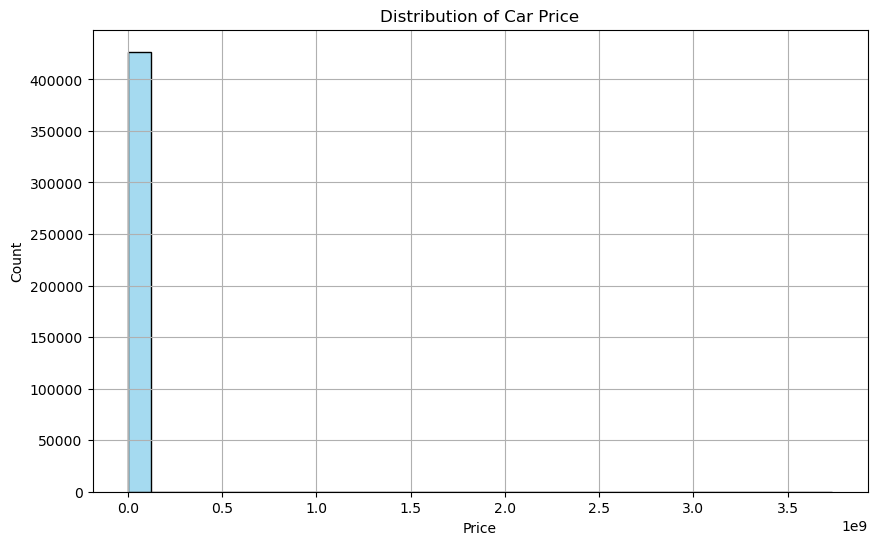

In [11]:
# Visualizing car price distribution
plt.figure(figsize=(10, 6))  
sns.histplot(data['price'], bins=30, color='skyblue', edgecolor='black') 
plt.title('Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Observations:**
- the plot doesn't capture the distribution well since the most dominant price composes 7.7% of the column while the other prices compose 0.7% and 0%
- will look at the distribution again once the data has been preprocessed 

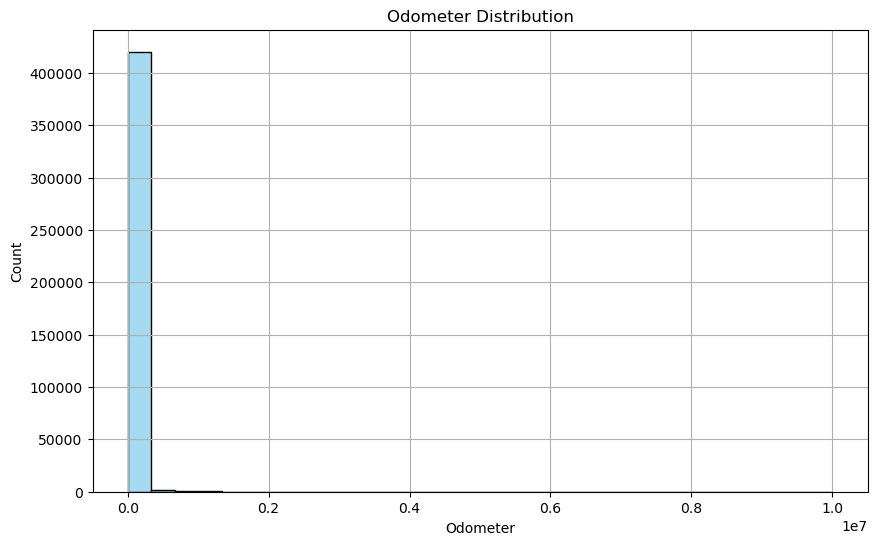

In [12]:
# Visualizing Odometer distribution
plt.figure(figsize=(10, 6))  
sns.histplot(data['odometer'], bins=30, color='skyblue', edgecolor='black') 
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Observations**:
- Similarly, we can't see the distribution of odometer values well

Taking a quick look at correlation matrix:

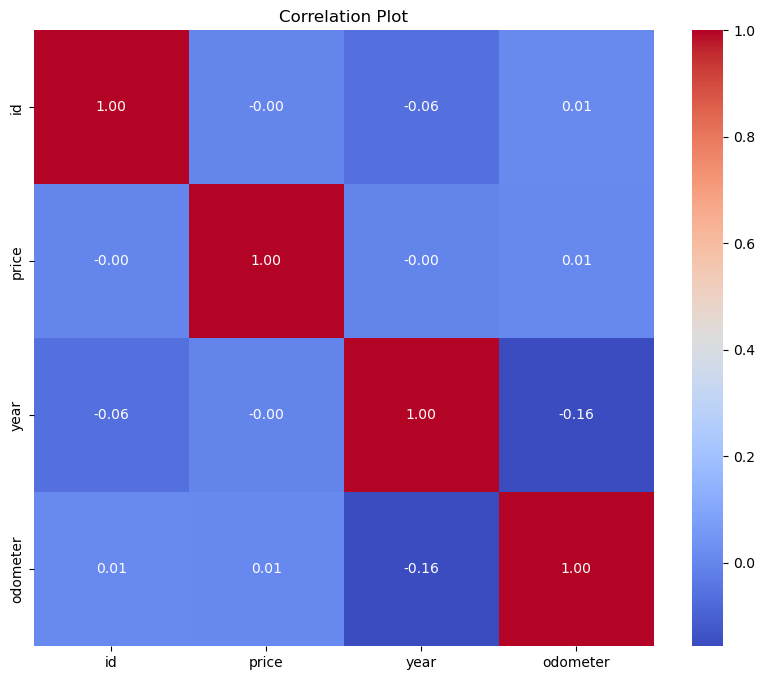

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# visualizing correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

**Observations:**
- odometer has a weak positive correlation with price
- price has a weak negative correlation with price

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### A. Dropping Features

1. Dropping **irrelevant features**: 
- **VIN and id** are not relevant in determining car prices. Therefore, these features can be safely dropped.

In [14]:
# Remove features that are not considered relevant for predicting car prices
data = data.drop(columns = ['VIN', 'id'], axis = 1)

2. Dropping **features with missing data / not worth including**:
- While **size** of car could be a good predictor for car price, **~71%** of data missing. One option would be to impute missing values. However, depending on how the values are imputed, there is a possiblity of introducing bias. Therefore, I have ultimately decided to remove this feature. 
- **Region** feature has 404 unique values. Additionally, each categories have less that 1% of total count. Given this distribution, I do not believe it is worth including this feature in the analysis. Therefore, I am dropping this feature. 
- **Model** also exhibits similar characteristics to Region mentioned above. For similar reasons, I have also decided to drop this feature.

In [15]:
# Dropping features mentioned about
data = data.drop(columns = ['size', 'region', 'model'], axis = 1)

In [16]:
# Dropping rows with null values
data = data.dropna()

In [17]:
data.info

<bound method DataFrame.info of         price    year manufacturer  condition    cylinders fuel  odometer  \
31      15000  2013.0         ford  excellent  6 cylinders  gas  128000.0   
32      27990  2012.0          gmc       good  8 cylinders  gas   68696.0   
33      34590  2016.0    chevrolet       good  6 cylinders  gas   29499.0   
34      35000  2019.0       toyota  excellent  6 cylinders  gas   43000.0   
35      29990  2016.0    chevrolet       good  6 cylinders  gas   17302.0   
...       ...     ...          ...        ...          ...  ...       ...   
426859  48590  2020.0     cadillac       good  6 cylinders  gas    7701.0   
426860  39990  2017.0     infiniti       good  8 cylinders  gas   41664.0   
426866  32990  2016.0     infiniti       good  8 cylinders  gas   55612.0   
426874  33590  2018.0        lexus       good  6 cylinders  gas   30814.0   
426878  28990  2018.0        lexus       good  6 cylinders  gas   30112.0   

       title_status transmission drive    t

In [18]:
data.shape

(117169, 13)

### B. Handling categorical features

3. We will convert the following categorical features into numerical features while preserving ordinal ranking:
  - condition
  - cylinders


In [19]:
rename_condition = {'new': 5, 'like new': 4, 'excellent': 3, 'good' : 2, 'fair' : 1, 'salvage': 0}
rename_cylinders = {'12 cylinders' : 12, '10 cylinders' : 10, '8 cylinders' : 8, '6 cylinders' : 6, '5 cylinders' : 5, '4 cylinders' : 4, '3 cylinders' : 3, 'other': 1}

In [20]:
data['condition'] = data['condition'].map(rename_condition)

In [21]:
data['cylinders'] = data['cylinders'].map(rename_cylinders)

In [22]:
# Verify mapping correctly works
converted_features = ['condition', 'cylinders']
for col in converted_features:
    counts = data[col].value_counts()
    perc = (data[col].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
    print('Feature: ' + col)
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')


Feature: condition
   count percentage
3  52698      45.0%
2  46997      40.1%
4  12684      10.8%
1   3861       3.3%
5    623       0.5%
0    306       0.3% 


Feature: cylinders
    count percentage
6   43425      37.1%
4   35985      30.7%
8   35350      30.2%
5     930       0.8%
10    883       0.8%
1     315       0.3%
3     218       0.2%
12     63       0.1% 




### C. Create new feature 'age' feature from 'year'

4. It would be beneficial to think of car in terms of age rather than year. Therefore, creating new feature age from year.

In [23]:
current_year = datetime.now().year
data['age'] = current_year - data['year']
data.drop(columns = ['year'], inplace = True)

### D. Removing samples with car prices equal to 0

5. Remove car prices equal to 0

In [24]:
# Filter out car price equal to 0
df_filtered = data[data['price'] != 0]

In [25]:
df_filtered

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
31,15000,ford,3,6,gas,128000.0,clean,automatic,rwd,truck,black,al,11.0
32,27990,gmc,2,8,gas,68696.0,clean,other,4wd,pickup,black,al,12.0
33,34590,chevrolet,2,6,gas,29499.0,clean,other,4wd,pickup,silver,al,8.0
34,35000,toyota,3,6,gas,43000.0,clean,automatic,4wd,truck,grey,al,5.0
35,29990,chevrolet,2,6,gas,17302.0,clean,other,4wd,pickup,red,al,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,cadillac,2,6,gas,7701.0,clean,other,fwd,other,black,wy,4.0
426860,39990,infiniti,2,8,gas,41664.0,clean,automatic,4wd,other,black,wy,7.0
426866,32990,infiniti,2,8,gas,55612.0,clean,automatic,rwd,other,black,wy,8.0
426874,33590,lexus,2,6,gas,30814.0,clean,automatic,rwd,sedan,white,wy,6.0


In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112796 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         112796 non-null  int64  
 1   manufacturer  112796 non-null  object 
 2   condition     112796 non-null  int64  
 3   cylinders     112796 non-null  int64  
 4   fuel          112796 non-null  object 
 5   odometer      112796 non-null  float64
 6   title_status  112796 non-null  object 
 7   transmission  112796 non-null  object 
 8   drive         112796 non-null  object 
 9   type          112796 non-null  object 
 10  paint_color   112796 non-null  object 
 11  state         112796 non-null  object 
 12  age           112796 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 12.0+ MB


### E. One hot encode categorical features

The following categorical values do not have any ordinal ranking. Therefore, we can apply one hot encoding on the following features.

In [27]:
ohe_features = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

df_final = pd.get_dummies(df_filtered, columns=ohe_features)

### F. Remove outliers

Noticed that features like odometer and price have huge range of values. The goal of this section is to reduce the number of samples that will be used by the predictive model. In other words, the aim is to choose a subset of the dat that will be sufficient for predicting car prices. To figure out the appropriate boundaries, I decided to explore the lower bound and upper bounds (using IQR) as well look at the min, median, and max values for each respective feature.

In [28]:
# Exploring lower bound and upper bound using IQR of 
Q1 = df_final['odometer'].quantile(0.25)
Q3 = df_final['odometer'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_odometer = Q1 - 1.5 * IQR
upper_bound_odometer = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_odometer)
print('Upper bound: ', upper_bound_odometer)


Lower bound:  -82723.0
Upper bound:  287405.0


In [29]:
# Exploring lower bound and upper bound using IQR of 
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_price)
print('Upper bound: ', upper_bound_price)

Lower bound:  -20242.5
Upper bound:  49737.5


In [30]:
# Creating function to explore range of values
def display_min_median_max(df, feature_name):
    min_value = df[feature_name].min()
    median_value = df[feature_name].median()
    max_value = df[feature_name].max()
    
    print(f"Summary for feature '{feature_name}':")
    print(f"Minimum value: {min_value}")
    print(f"Median value: {median_value}")
    print(f"Maximum value: {max_value}")

In [31]:
display_min_median_max(df_final, 'odometer')

Summary for feature 'odometer':
Minimum value: 0.0
Median value: 103257.0
Maximum value: 10000000.0


In [32]:
display_min_median_max(df_final, 'price')

Summary for feature 'price':
Minimum value: 1
Median value: 11500.0
Maximum value: 3736928711


The following values chosen for the boundaries were adjusted through experimentation:

In [33]:
df_final=df_final[(df_final['odometer'] < upper_bound_odometer) & (df_final['price'] > 500) & (df_final['price'] < 200000)];

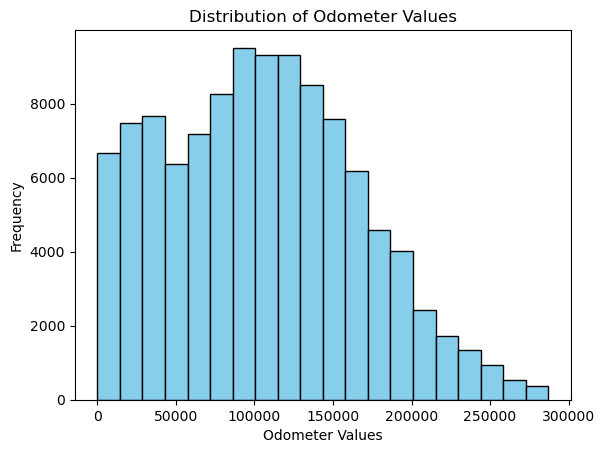

In [34]:
# Visualizing distribution of odometer after preprocessing
df_final['odometer'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Odometer Values')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer Values')
plt.show()

**Observations**:
- We can now see the dsitribution of odometer much more clearly after preprocessing

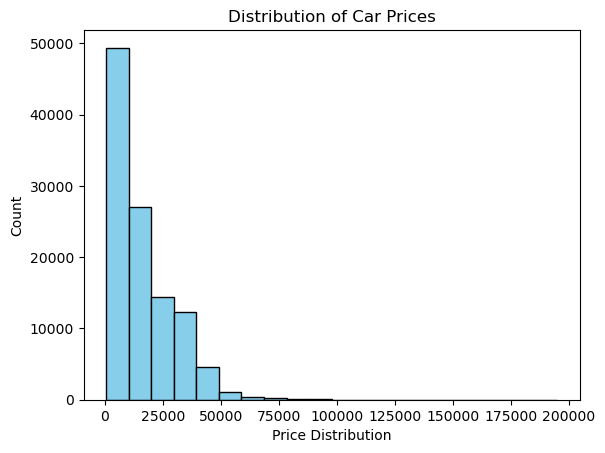

In [35]:
# Visualizing distribution of Car Prices after preprocessing
df_final['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

**Observations**:
- We can see that the price distribution is right-skewed.
- This suggests that we should apply log transformation to the price to reduce skewness

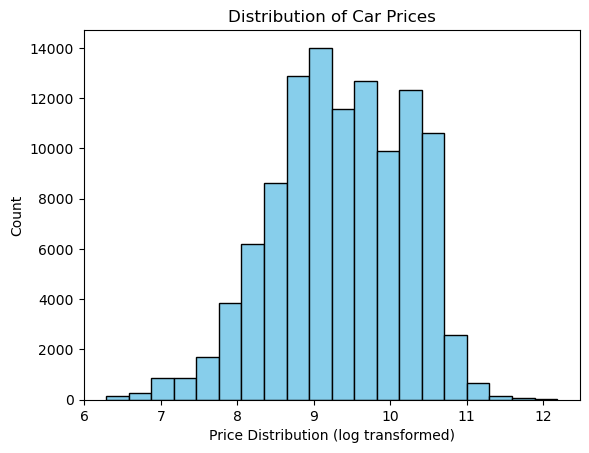

In [36]:
# Applying log transformation and viewing distribution
np.log(df_final['price']).plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution (log transformed)')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

**Observations:**
- We can observe that applying log transformation helped reduce skewness.
- We will use the log transformation of price in the next step (modeling)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Before we build the models, we first need to extract the dependent variable (price) in variable y while variable x will contain the independent variables.

In [37]:
# Create X and y sets used for modeling
y = df_final['price'].astype(float);
X = df_final.drop(columns='price', axis=1)

In [38]:
#split the dataset into training set and test set
# Applying log transformation to target variable to reduce skewness
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), random_state = 42);

In this section, I'll be building three models:
1. Linear Regression with SequentialFeatureSelector
2. Ridge Regression with GridSearchCV
3. Lasso Regression with GridSearchCV

For each model, we will also assess cross-validation score.

### 1. Linear Regression (2 models)

a. Linear Regression

In [39]:
linreg_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('linear', LinearRegression())])

linreg_pipe.fit(X_train, y_train)

linreg_train_preds = linreg_pipe.predict(X_train)
linreg_test_preds = linreg_pipe.predict(X_test)
linreg_train_mse = mean_squared_error(y_train, linreg_train_preds)
linreg_test_mse = mean_squared_error(y_test, linreg_test_preds)

# Using MSE as evaluation metric which measures magnitude of error (predicted v.s actual value)
print(f'Train MSE: {linreg_train_mse}')
print(f'Test MSE: {linreg_test_mse}')
linreg_pipe

Train MSE: 0.2324335214108576
Test MSE: 4.466281688553043e+18


Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

**Observations:**
- The value returned for Test MSE is extremely high so I do not believe this is a suitable model for determining car prices.

b. Linear regression with SequentialFeatureSelector

In [40]:
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                          ('scaler', StandardScaler()),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

Code below commented out (see Observations below)

In [41]:
# param_dict = {'selector__n_features_to_select' : [2, 3, 4, 5, 6]}

# selector_grid = GridSearchCV(selector_pipe, param_grid = param_dict)

# selector_grid.fit(X_train, y_train)

# selector_train_preds = selector_grid.predict(X_train)
# selector_test_preds = selector_grid.predict(X_test)

# selector_train_mse = mean_squared_error(selector_train_preds, y_train)
# selector_test_mse = mean_squared_error(selector_test_preds, y_test)

**Observations**:
- Attempted to build a model with SequentialFeatureSelector() and Linear Regression
- However given the size of the dataset, particularly the number of features, this model doesn't perform efficiently
- **Therefore, no results were obtained from this model and the code has been commented out**
- Instead, we will focus on models using ridge regression and lasso regression. Additionally, we will be utilizing GridSearchCV to find the optimal values for alpha

### 2. Ridge Regression Model with GridSearchCV

In [42]:
# Specifying alpha values to try out when using GridSearchCV
# Using np.logspace to generate range of values since log transformation was applied to target variable
ridge_param_dict = {'ridge__alpha': np.logspace(0, 5, 50)}

# create a two step pipeline where the first step involves standardizing the data followed by perform ridge regression
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])

# Using GridSearchCV to find the optimal value for alpha in the Ridge regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, cv = 5)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

# Using MSE as evaluation metric which measures magnitude of error (predicted v.s actual value)
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.2324245105493568
Test MSE: 0.2345507578929


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [43]:
# extracting best estimator (pipeline)
best_estimator_ridge = ridge_grid.best_estimator_

# extract model step from best estimator
best_model_ridge = best_estimator_ridge.named_steps['ridge']

feature_names = X_train.columns

# extract feature coefficients
coefs_ridge = best_model_ridge.coef_

In [44]:
best_model_ridge

Ridge(alpha=86.8511373751353)

**Observations:**
- Optimal value chosen for alpha is ~86.85

In [45]:
# Assessing model using cross-validation using cross_val_score 
# Setting cv = 5, represents performing 5-fold cross-validation
cv_scores_ridge = cross_val_score(best_model_ridge, X_train, y_train, cv = 5)

mean_cv_score_ridge = np.mean(cv_scores_ridge)

print("Cross-validation scores: ", cv_scores_ridge)
print("Mean cross-validation score: ", mean_cv_score_ridge)

Cross-validation scores:  [0.69122584 0.68988603 0.68540467 0.68865125 0.68723561]
Mean cross-validation score:  0.6884806782936972


**Observations**:
- Mean cross-validation score obtained ~ 0.68 which is a bit surprising given the result of Test MSE above. 
- Was expecting a higher cross-validation score.

In [46]:
# Creating dataframe for coefficients
# Adding a third column that views the magnitude of the coefficients, displayed in descending order
coeff_ridge_df = pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_ridge})
coeff_ridge_df['abs_coef'] = abs(coeff_ridge_df.coef)
coeff_ridge_df = coeff_ridge_df.sort_values(by='abs_coef', ascending = False)
coeff_ridge_df.head(25)

,feature_names,coef,abs_coef
2,odometer,-0.415384,0.415384
3,age,-0.212133,0.212133
1,cylinders,0.144849,0.144849
0,condition,0.132305,0.132305
46,fuel_diesel,0.083760,0.083760
61,drive_fwd,-0.083430,0.083430
72,type_sedan,-0.075837,0.075837
73,type_truck,0.073157,0.073157
59,transmission_other,0.065273,0.065273
60,drive_4wd,0.061873,0.061873


In [47]:
top_15_coeff_ridge = coeff_ridge_df.head(15)

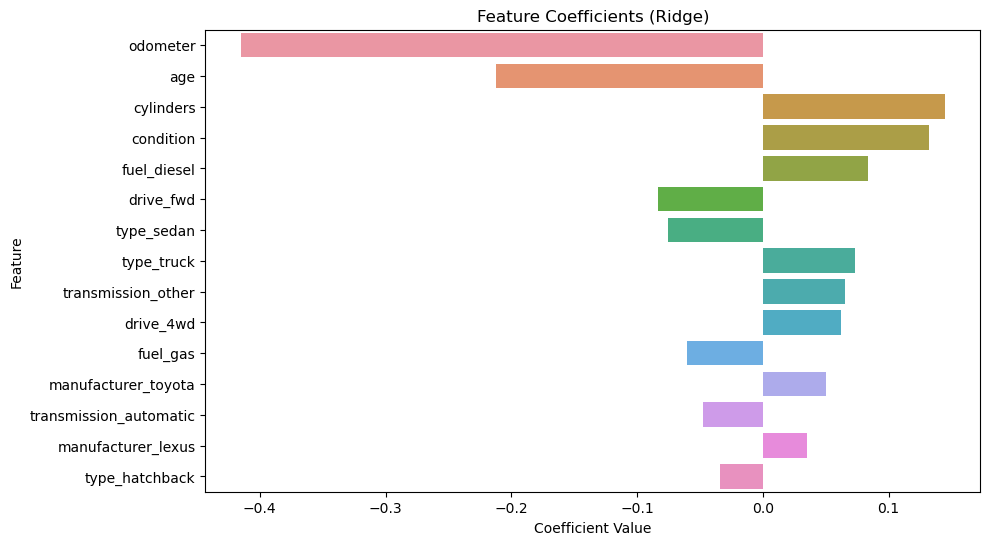

In [48]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [49]:
# Examining Feature Importance
perm_importance = permutation_importance(best_estimator_ridge, X_train, y_train, n_repeats = 10, random_state = 42)

# Get the feature importances
feature_importances_ridge = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_ridge)[::-1]

# Create dataframe for feature and corresponding importance value
ridge_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_ridge[sorted_idx]})

In [50]:
ridge_feature_importance_df.head(25)

,Feature,Importance
0,odometer,0.459847
1,age,0.120039
2,cylinders,0.056127
3,condition,0.046523
4,fuel_diesel,0.018584
5,drive_fwd,0.018451
6,type_sedan,0.015384
7,type_truck,0.014379
8,transmission_other,0.011474
9,drive_4wd,0.010089


In [51]:
# Create new data frame with top 15 important features
top_15_important_feat_ridge = ridge_feature_importance_df.head(15)

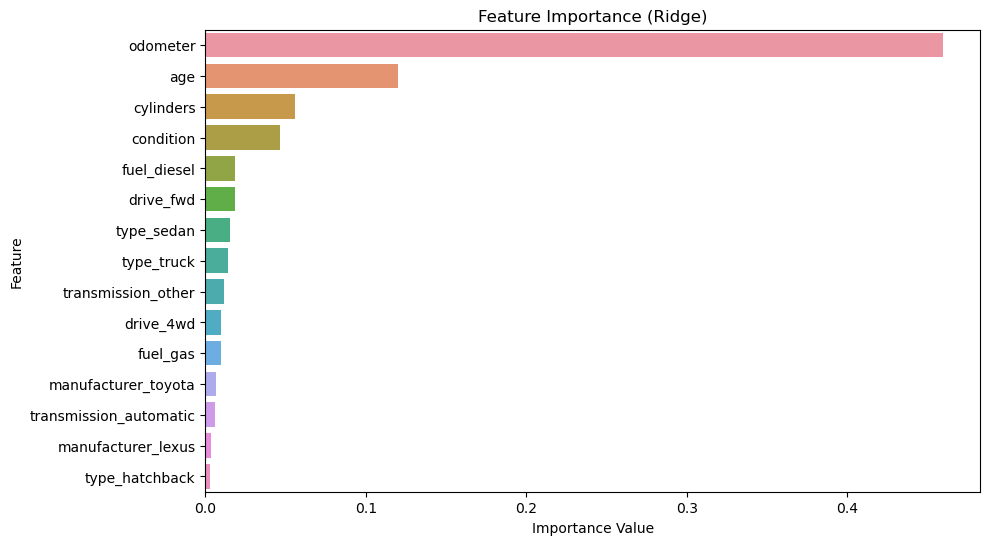

In [52]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

### 3. Lasso Regression with GridSearchCV

In [53]:
# Specifying alpha values to try out when using GridSearchCV
# Had to adjust values since I noticed that when alpha value was set too high, every coefficient value became zero
# Intially used same values used in ridge model (0, 5, 50)
lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}

# create a two step pipeline where the first step involves standardizing the data followed by perform lasso regression
lasso_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('lasso', Lasso())])

# Using GridSearchCV to find the optimal value for alpha in the Lasso regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
lasso_grid = GridSearchCV(lasso_pipe, param_grid = lasso_param_dict, cv = 5)
lasso_grid.fit(X_train, y_train)
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)

print(f'Train MSE: {lasso_train_mse}')
print(f'Test MSE: {lasso_test_mse}')
lasso_pipe

Train MSE: 0.2596268725192799
Test MSE: 0.2644335004963303


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

In [54]:
# extracting best estimator (pipeline)
best_estimator_lasso = lasso_grid.best_estimator_

# extract model step from best estimator
best_model_lasso = best_estimator_lasso.named_steps['lasso']

feature_names = X_train.columns

# extract feature coefficients
coefs_lasso = best_model_lasso.coef_

In [55]:
best_model_lasso

Lasso(alpha=0.03162277660168379)

**Observations**:
- Optimal value chose for alpha ~ 0.032

In [56]:
# Assessing model using cross-validation using cross_val_score 
# Setting cv = 5, represents performing 5-fold cross-validation
cv_scores_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv = 5)

mean_cv_score_lasso = np.mean(cv_scores_lasso)

print("Cross-validation scores: ", cv_scores_lasso)
print("Mean cross-validation score: ", mean_cv_score_lasso)

Cross-validation scores:  [0.61738474 0.61065636 0.60394449 0.60938088 0.60687191]
Mean cross-validation score:  0.6096476784508839


**Observations**:
- Mean cross-validation score obtained ~ 0.61 which is a bit surprising given the result of Test MSE above. 
- Similar to the previous model, was expecting a higher cross-validation score.

In [57]:
# Creating dataframe for coefficients
# Adding a third column that views the magnitude of the coefficients, displayed in descending order
coeff_lasso_df = pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_lasso})
coeff_lasso_df['abs_coef'] = abs(coeff_lasso_df.coef)
coeff_lasso_df = coeff_lasso_df.sort_values(by='abs_coef', ascending = False)
coeff_lasso_df.head(25)

,feature_names,coef,abs_coef
2,odometer,-0.402233,0.402233
3,age,-0.194585,0.194585
1,cylinders,0.140694,0.140694
61,drive_fwd,-0.132872,0.132872
0,condition,0.099348,0.099348
46,fuel_diesel,0.084081,0.084081
59,transmission_other,0.082203,0.082203
72,type_sedan,-0.060419,0.060419
73,type_truck,0.050146,0.050146
48,fuel_gas,-0.035965,0.035965


In [58]:
top_15_coeff_lasso = coeff_lasso_df.head(15)

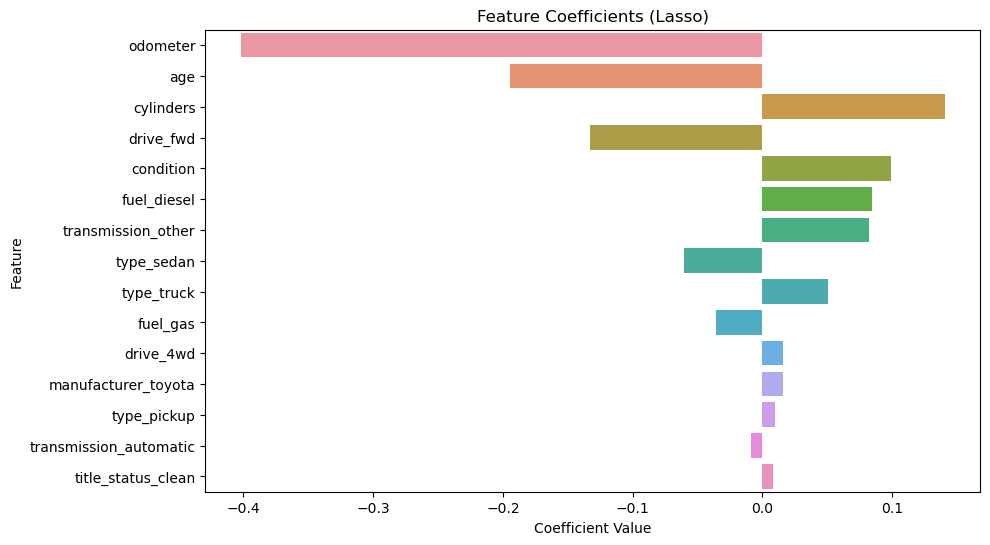

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_lasso, orient = 'h')
plt.title('Feature Coefficients (Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [60]:
# Examining Feature Importance
perm_importance = permutation_importance(best_estimator_lasso, X_train, y_train, n_repeats=10, random_state=42)

# Get the feature importances
feature_importances_lasso = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_lasso)[::-1]

# Create dataframe for feature and corresponding importance value
lasso_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_lasso[sorted_idx]})

In [61]:
lasso_feature_importance_df.head(15)

,Feature,Importance
0,odometer,0.464700
1,age,0.117430
2,cylinders,0.064724
3,drive_fwd,0.057964
4,condition,0.034570
5,fuel_diesel,0.025717
6,transmission_other,0.025090
7,type_sedan,0.014856
8,type_truck,0.010998
9,fuel_gas,0.006366


In [62]:
top_15_important_feat_lasso = lasso_feature_importance_df.head(15)

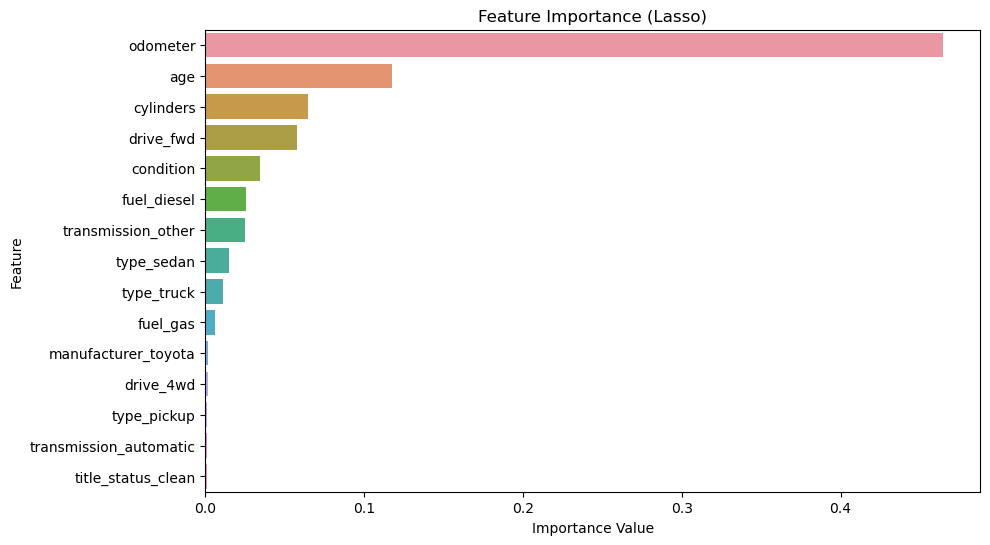

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_lasso, orient = 'h')
plt.title('Feature Importance (Lasso)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Findings**:

To quickly recap, the goal is to help our client better understand what attributes drive the prices of used cars. In order to identify these key drivers, we built three different models, which we will now proceed to evaluate and discern meaningful information. 

Among the three models, the first model (Linear Regression) performed the worst. In particular, the Test MSE was extremely high (4.466281688553043e+18) which led to the conclusion that this was not a suitable model for extracting meaningful information regarding key drivers. In contrast, both the ridge regression model and lasso regression model performed much better, arriving at comparable results. In terms of Test MSE, ridge regression performed slightly better than lasso regression (0.23 vs 0.26). Besides computing Train and Test MSE, we obtained feature coefficients as well as explored feature importance.

**Comparing feature coefficients:**

First, to evaluate feature coefficients, it would be beneficial to view the magnitude of the coefficient (the signs simply indicate positive or negative relationship). These are the top 5 features with the highest coefficient obtained for both ridge and lasso respectively:

<!-- Ridge Regression:
1. odometer (0.415384)
2. age (0.212133)
3. cylinders (0.144849)	
4. condition (0.132305)	
5. fuel_diesel (0.083760)

Lasso Regression:
1. odometer (0.402233)
2. age (0.194585)
3. cylinders (0.140694)	
4. drive_fwd (0.132872)
5. condition (0.099348) -->

**Ridge Regression top 5 features based on coefficients**:

In [64]:
# Ridge Regression top 5 features
coeff_ridge_df.head(5)

,feature_names,coef,abs_coef
2,odometer,-0.415384,0.415384
3,age,-0.212133,0.212133
1,cylinders,0.144849,0.144849
0,condition,0.132305,0.132305
46,fuel_diesel,0.083760,0.083760


**Lasso Regression top 5 features based on coefficients**:

In [65]:
# Lasso Regression top 5 features
coeff_lasso_df.head(5)

,feature_names,coef,abs_coef
2,odometer,-0.402233,0.402233
3,age,-0.194585,0.194585
1,cylinders,0.140694,0.140694
61,drive_fwd,-0.132872,0.132872
0,condition,0.099348,0.099348


As we can see both models arrived at similar conclusions regarding features with highest coefficients (magnitude). The top three features remain the same (odometer, age, cylinders) while the fourth and fifth features slightly differ. Based on the results, I believe that we can confidently say that odometer, age, and cylinders are key drivers for used car prices. 

**Comparing feature importance**:

In addition, to feature coefficients, we also explored feature importance. Similarly, we will examine the top 5 features for both models.

<!-- Ridge Regression:
1. odometer	(0.459847)
2. age	(0.120039)
3. cylinders (0.056127)
4. condition (0.046523)
5. fuel_diesel	(0.018584)

Lasso Regression:
1. odometer	(0.464700)
2. age	(0.117430)
3. cylinders (0.064724)
4. drive_fwd (0.057964)
5. condition (0.034570) -->

**Ridge Regression top 5 features based on importance**:

In [66]:
ridge_feature_importance_df.head(5)

,Feature,Importance
0,odometer,0.459847
1,age,0.120039
2,cylinders,0.056127
3,condition,0.046523
4,fuel_diesel,0.018584


**Lasso Regression top 5 features based on importance**:

In [67]:
lasso_feature_importance_df.head(5)

,Feature,Importance
0,odometer,0.464700
1,age,0.117430
2,cylinders,0.064724
3,drive_fwd,0.057964
4,condition,0.034570


As we can see, the rankings align with our rankings obtained when looking at feature coefficients. This further confirms our key takeaways regarding key drivers for used card prices.

**Reflection**:
- While shown are only the final findings, revisitation of earlier phases particularly data preparation and data modeling was necessary. In particular, preprocessing the data to remove outliers greatly helped increase the performance of the models. Additionally, experimenting wtih appropriate ranges for alpha values (to use in GridSearchCV) was essential. For example, one issue that I encountered earlier was all coefficient values from lasso model being zero which was due to choosing too high of a range for alpha. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Dear client, using a collected dataset of used cars, we were able to identify key drivers of car prices using multiple machine learning models. Across the models, there were no disputes for the top three features important for determing car prices. The first important feature in predicting used car prices is odometer. More specifically, as the value of odometer increase, the price of used car decreases. The second important feature is age. Similar to odomoeter, as the age of the car increases, the price of the car decreases. The last important feature is number of cylinders. Unlike odometer and age, cylinders exhibits a positive relationship to car prices, meaning as the number of cylinders increases, the price of the car increases as well. We have also identified other potentially important features to consider across the two models. In particular, we found that condition of the car, the type of fuel used (in particular deisal) and front wheel drive configuration can have an impact as well. Both the condition of the car and deisal fuel exhibit a positive relationship with price while front wheel drive configurations exhibits a negative relationship. Therefore, if you want to mark used cars at higher prices, prioritize cars with lower odometer readings, newer manufactoring year, and higher number of cylinders.

### Future considerations and Next Steps


Overall, we were able to extract meaningful data regarding key drivers for used car prices. However, during the data preparation steps, a sizeable amount of data was dropped since it proved difficult to impute missing values without the possibility of introducing bias. Two of the columns that were dropped were 'size' and 'model' which could be important when predicting car price. Therefore, it would be good to collect more complete date regarding these two features and see how the coefficients change. Additionally, it would be interesting to build a model incorporating polynomial degrees and see how it performs relative to the other models.  